#Visual story telling part 2: Capital Metro data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('capmetro_UT.csv')
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [14]:
df.describe()

,boarding,alighting,temperature,hour_of_day
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,51.511676,47.646291,69.282473,13.500000
std,48.820284,50.069866,13.540249,4.610168
min,0.000000,0.000000,29.180000,6.000000
25%,13.000000,13.000000,59.195000,9.750000
50%,33.000000,28.000000,72.750000,13.500000
75%,79.250000,64.000000,79.290000,17.250000
max,288.000000,304.000000,97.640000,21.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5824 non-null   object 
 1   boarding     5824 non-null   int64  
 2   alighting    5824 non-null   int64  
 3   day_of_week  5824 non-null   object 
 4   temperature  5824 non-null   float64
 5   hour_of_day  5824 non-null   int64  
 6   month        5824 non-null   object 
 7   weekend      5824 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 364.1+ KB


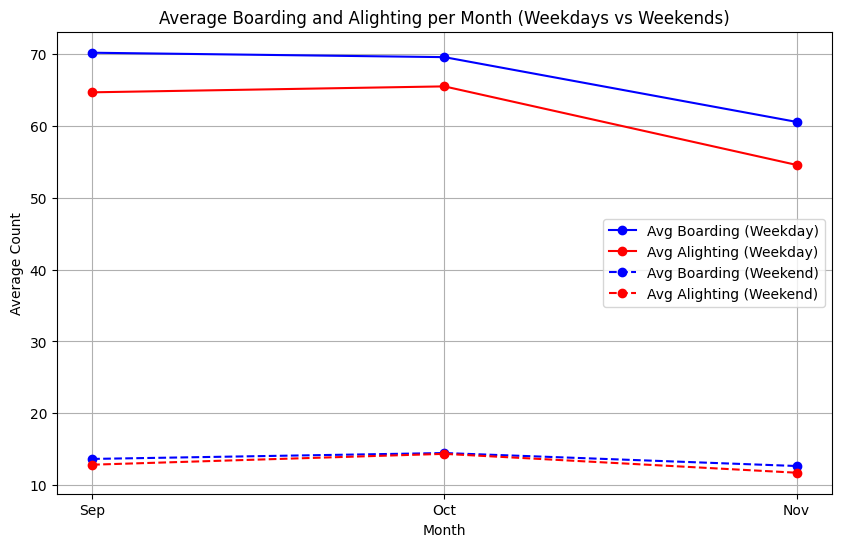

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['month'] = pd.Categorical(df['month'], categories=['Sep', 'Oct', 'Nov'], ordered=True)
grouped = df.groupby(['month', 'weekend']).agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()
weekdays = grouped[grouped['weekend'] == 'weekday']
weekends = grouped[grouped['weekend'] == 'weekend']
plt.figure(figsize=(10, 6))
plt.plot(weekdays['month'], weekdays['boarding'], color='blue', marker='o', label='Avg Boarding (Weekday)')
plt.plot(weekdays['month'], weekdays['alighting'], color='red', marker='o', label='Avg Alighting (Weekday)')

plt.plot(weekends['month'], weekends['boarding'], color='blue', marker='o', linestyle='--', label='Avg Boarding (Weekend)')
plt.plot(weekends['month'], weekends['alighting'], color='red', marker='o', linestyle='--', label='Avg Alighting (Weekend)')

plt.title('Average Boarding and Alighting per Month (Weekdays vs Weekends)')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()

plt.grid(True)
plt.show()

- People take the Capital Metro more on weekdays than weekends
- There is a dip in the avg number of people using the Capital metro, one of the reasons can be the near end of the Fall term and celebrations like Thanksgiving, another reason for the reduction can be seasonal as winter starts around November.

Lets explore the november being cold hypothesis and the Thanksgiving Hopethesis

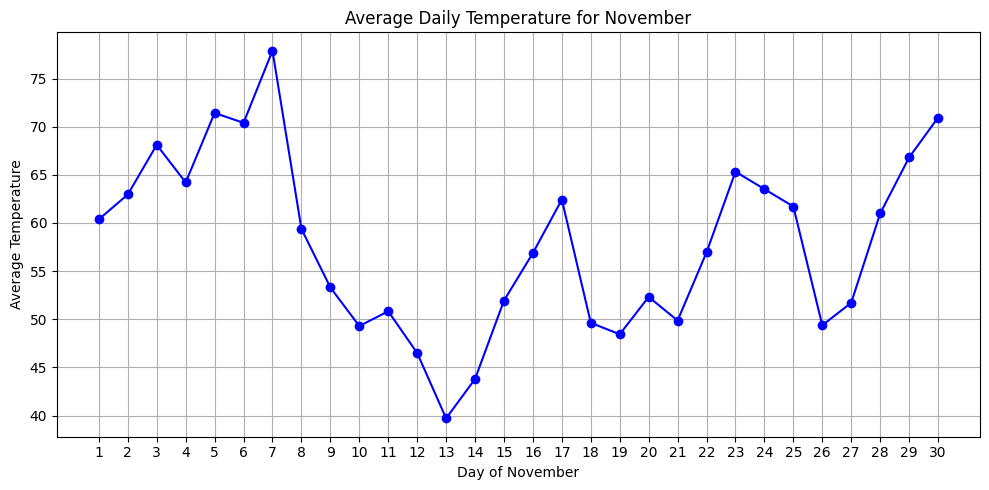

In [17]:
df_november = df[df['timestamp'].dt.month == 11]
df_november['day_of_month'] = df_november['timestamp'].dt.day
daily_avg_temp = df_november.groupby('day_of_month')['temperature'].mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg_temp.index, daily_avg_temp.values, marker='o', linestyle='-', color='b')
plt.xlabel('Day of November')
plt.ylabel('Average Temperature')
plt.title('Average Daily Temperature for November')
plt.grid(True)
plt.xticks(daily_avg_temp.index)
plt.tight_layout()

plt.show()

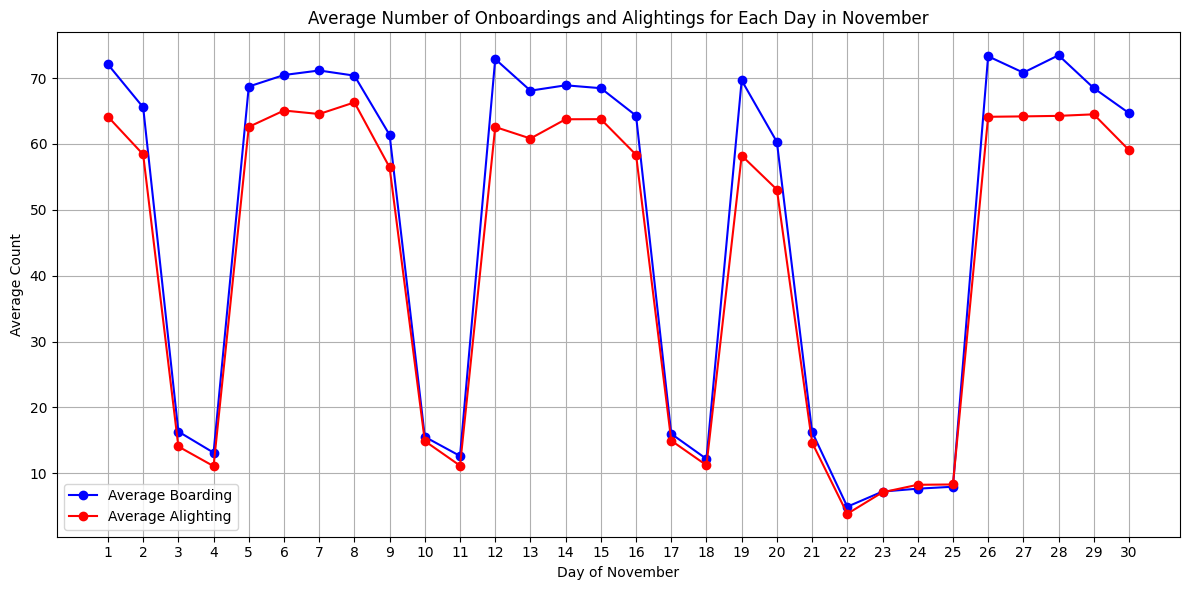

In [18]:

df_november = df[df['timestamp'].dt.month == 11]
df_november['day_of_month'] = df_november['timestamp'].dt.day

daily_avg = df_november.groupby('day_of_month').agg({
    'boarding': 'mean',
    'alighting': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(daily_avg['day_of_month'], daily_avg['boarding'], marker='o', linestyle='-', color='b', label='Average Boarding')
plt.plot(daily_avg['day_of_month'], daily_avg['alighting'], marker='o', linestyle='-', color='r', label='Average Alighting')

plt.xlabel('Day of November')
plt.ylabel('Average Count')
plt.title('Average Number of Onboardings and Alightings for Each Day in November')
plt.grid(True)
plt.xticks(daily_avg['day_of_month'])
plt.legend()
plt.tight_layout()
plt.show()

- Based on the graphs, it is evident that temperature does not significantly affect the number of people traveling via the Capital Metro. However, the Thanksgiving(22nd Nov, 2018) hypothesis appears to be accurate. We observe a substantial decrease in the number of passengers using the Capital Metro during this period, which supports the assumption that people return home to celebrate Thanksgiving with their families.

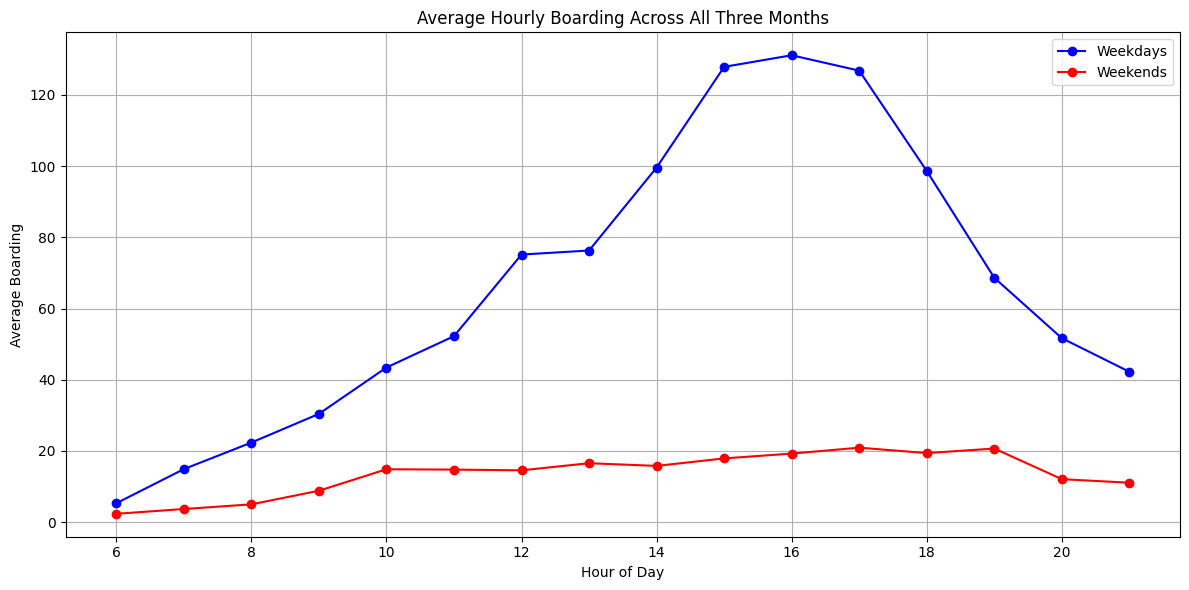

In [19]:

df['hour_of_day'] = df['timestamp'].dt.hour
df['is_weekend'] = df['weekend'] == 'weekend'
hourly_avg = df.groupby(['hour_of_day', 'is_weekend'])['boarding'].mean().unstack().fillna(0)
plt.figure(figsize=(12, 6))

plt.plot(hourly_avg.index, hourly_avg[False], marker='o', linestyle='-', color='b', label='Weekdays')
plt.plot(hourly_avg.index, hourly_avg[True], marker='o', linestyle='-', color='r', label='Weekends')

plt.xlabel('Hour of Day')
plt.ylabel('Average Boarding')
plt.title('Average Hourly Boarding Across All Three Months')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

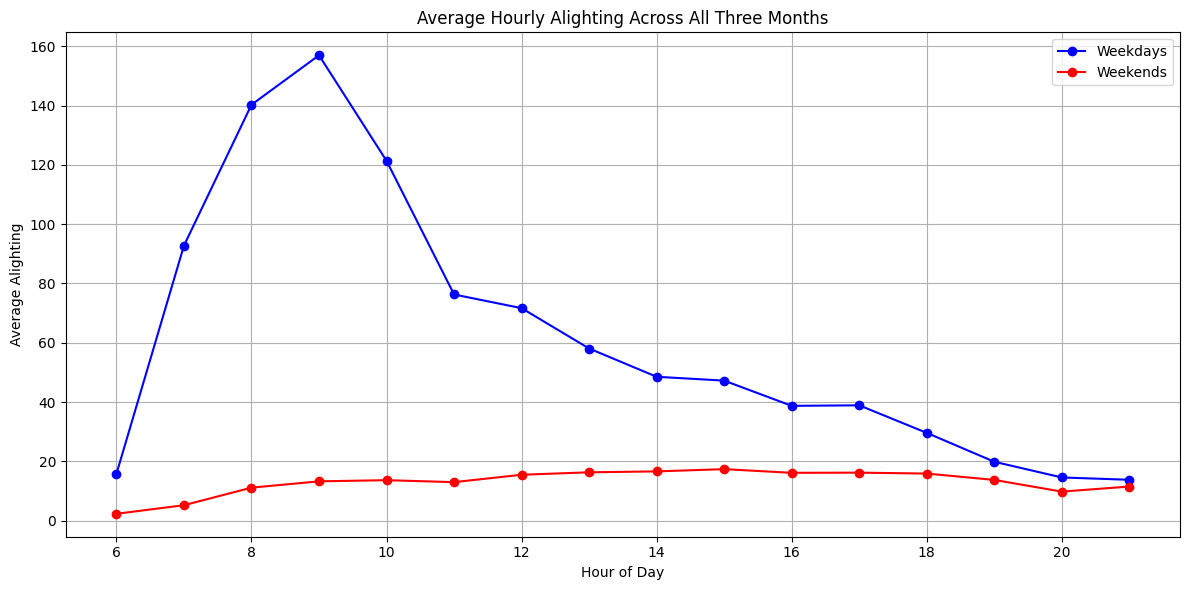

In [20]:

df['hour_of_day'] = df['timestamp'].dt.hour
df['is_weekend'] = df['weekend'] == 'weekend'
hourly_avg = df.groupby(['hour_of_day', 'is_weekend'])['alighting'].mean().unstack().fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg[False], marker='o', linestyle='-', color='b', label='Weekdays')
plt.plot(hourly_avg.index, hourly_avg[True], marker='o', linestyle='-', color='r', label='Weekends')

plt.xlabel('Hour of Day')
plt.ylabel('Average Alighting')
plt.title('Average Hourly Alighting Across All Three Months')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- The data shows that the average number of onboardings peaks between 3 to 5 PM, while the average number of alightings peaks between 8 to 10 AM.
- Given that the data includes shuttles to, from, and around the UT campus, it is logical that many passengers alight from the Capital Metro in the fall months when classes typically start between 8 to 11 AM and finish between 3 to 5 PM.